<a href="https://colab.research.google.com/github/nicolemaracaja/IA-UFCG-/blob/main/Sinton_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sinton.IA: Agente Inteligente para Cria√ß√£o de Playlists Personalizadas

**Disciplina:** Intelig√™ncia Artificial - Turma 01

**Professor(a):** Herman Martin Gomes

**Integrantes:**

*   Francivaldo Cabral de Andrade - 121111029
*   Gustavo da Silva Soares - 121110455
*   Jhonnathas Swerley Farias dos Santos - 120210932
*   Nicolas Wesley Correia Paz - 123110202
*   Nicole Brito Maracaj√° - 123111413

---
# 1. Introdu√ß√£o

### Resumo
Com a enorme quantidade de m√∫sicas dispon√≠veis em plataformas de streaming, descobrir faixas que realmente combinem com o usu√°rio tornou-se desafiador. Este projeto apresenta o Sinton.IA, um agente inteligente capaz de recomendar m√∫sicas e criar playlists personalizadas. O sistema utiliza an√°lise de letras de m√∫sicas, considerando o humor e as prefer√™ncias musicais do usu√°rio. T√©cnicas de processamento de texto e algoritmos de Aprendizado de M√°quina s√£o empregados para classificar as m√∫sicas e gerar recomenda√ß√µes relevantes e adaptativas.

### Objetivos

* **Objetivo Principal:** Desenvolver um agente funcional em um Notebook Python capaz de gerar playlists personalizadas com base no perfil e estado emocional do usu√°rio.
* **Objetivos Secund√°rios:**
    * Implementar a an√°lise de letras de m√∫sicas para identificar temas, emo√ß√µes e padr√µes lingu√≠sticos.
    * Treinar e avaliar modelos de Machine Learning para classifica√ß√£o de m√∫sicas por humor, g√™nero e conte√∫do l√≠rico.
    * Construir uma interface de usu√°rio simples e interativa para a intera√ß√£o com o agente.
    * Analisar a performance dos modelos e discutir os resultados obtidos.

### Metodologia
O projeto foi estruturado nas seguintes etapas:
1.  **Coleta e An√°lise de Dados:** Sele√ß√£o e explora√ß√£o de bases de dados musicais p√∫blicas, incluindo letras e metadados das m√∫sicas.
2.  **Extra√ß√£o de Caracter√≠sticas:** Transforma√ß√£o das letras em vetores de caracter√≠sticas num√©ricas, an√°lise de sentimentos e identifica√ß√£o de padr√µes textuais.
3.  **Modelagem e Treinamento:** Treinamento e avalia√ß√£o de modelos de classifica√ß√£o supervisionada.
4.  **Implementa√ß√£o do Agente:** Desenvolvimento da l√≥gica de recomenda√ß√£o e da interface do usu√°rio.

---
# 2. Instala√ß√£o de bibliotecas necess√°rias

Para a cria√ß√£o do nossio agente inteligente, iremos instalar as seguintes bibliotecas:
1.   `requests` ‚Üí Para fazer requisi√ß√µes √† API do Deezer.
2.   `pandas` ‚Üí Para manipula√ß√£o de tabelas e DataFrames.
3.   `librosa` ‚Üí Para an√°lise de √°udio (extra√ß√£o de features musicais).
4.   `scikit-learn` ‚Üí Para modelos de Machine Learning, normaliza√ß√£o e treino.
5.   `pydub / soundfile` ‚Üí Para manipula√ß√£o de arquivos de √°udio.
6.   `numpy` ‚Üí Para c√°lculos num√©ricos e vetoriais.
7. `tqdm` ‚Üí Para mostrar barras de progresso (√∫til em loops longos).





In [ ]:
!pip install requests pandas librosa scikit-learn pydub soundfile numpy tqdm

---
# 3. Importa√ß√µes

Aqui, importamos as bibliotecas instaladas e algumas fun√ß√µes que ser√£o √∫teis no decorrer do c√≥digo.

In [ ]:
import requests
import pandas as pd
import numpy as np
import os
import time

# fun√ß√µes para processamento de √°udio
import librosa
from pydub import AudioSegment

# fun√ß√µes para interatividade e visualiza√ß√£o
from tqdm.notebook import tqdm
from IPython.display import display, Audio

# fun√ß√£o para normaliza√ß√£o de dados
from sklearn.preprocessing import MinMaxScaler

print("Bibliotecas importadas com sucesso!")

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Bibliotecas importadas com sucesso!


---
# 4. Coleta de Dados via API do Deezer

---
### 4.1. Fun√ß√£o gen√©rica para pegar os dados da API e tratar os poss√≠veis erros

In [ ]:
def fetchData(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            return {"error": f"Erro na API. Status code: {response.status_code}", "data": []}
    except requests.exceptions.RequestException as e:
        return {"error": f"Erro de conex√£o: {e}", "data": []}

---
### 4.2. Busca de M√∫sicas com a API do Deezer usando um termo de pesquisa



In [ ]:
def fetchSongs(term, limit=25):
    url = f"https://api.deezer.com/search?q={term}&limit={limit}"
    data = fetchData(url)
    return data

---
### 4.3. Criando dataframe do Pandas com as informa√ß√µes das m√∫sicas

In [ ]:
def insertSongsIntoDataFrame(songsInfo):
    musicas = []
    for song in songsInfo.get("data", []):
        if song.get("preview"):
            musicas.append({
                "Artista": song["artist"]["name"],
                "M√∫sica": song["title"],
                "√Ålbum": song["album"]["title"],
                "Pr√©via_URL": song["preview"]
            })
    df_inicial = pd.DataFrame(musicas)
    return df_inicial

---
### 4.4. Executando a busca e criando o DataFrame

In [ ]:
termo_de_busca = "ABBA"
print(f"Buscando m√∫sicas para o termo: '{termo_de_busca}'...")

dados_musicas = fetchSongs(termo_de_busca, limit=50)
df_inicial = insertSongsIntoDataFrame(dados_musicas)

print(f"{len(df_inicial)} m√∫sicas com pr√©via de √°udio encontradas.")
display(df_inicial.head())

Buscando m√∫sicas para o termo: 'ABBA'...
50 m√∫sicas com pr√©via de √°udio encontradas.


Artista                                       M√∫sica  \
0    ABBA                                Dancing Queen   
1    ABBA                      The Winner Takes It All   
2    ABBA  Gimme! Gimme! Gimme! (A Man After Midnight)   
3    ABBA                      Lay All Your Love On Me   
4    ABBA                                    Mamma Mia   

                           √Ålbum  \
0                      ABBA Gold   
1                      ABBA Gold   
2                      ABBA Gold   
3  Abba Gold Anniversary Edition   
4                      ABBA Gold   

                                          Pr√©via_URL  
0  https://cdnt-preview.dzcdn.net/api/1/1/9/1/6/0...  
1  https://cdnt-preview.dzcdn.net/api/1/1/f/9/f/0...  
2  https://cdnt-preview.dzcdn.net/api/1/1/2/2/6/0...  
3  https://cdnt-preview.dzcdn.net/api/1/1/7/d/e/0...  
4  https://cdnt-preview.dzcdn.net/api/1/1/2/f/4/0...

---
### 4.5. Testando pr√©via de 30 segundos da m√∫sica

In [ ]:
from IPython.display import Audio

result = fetchSongs("ABBA")

if "data" in result and len(result["data"]) > 0:
    song = result["data"][0]
    print(f"Tocando: {song['title']} - {song['artist']['name']}")
    preview_url = song["preview"]

    display(Audio(preview_url))
else:
    print("Nenhuma m√∫sica encontrada.")

Tocando: Dancing Queen - ABBA


---
# 5. Coleta de Dados via API do Lyrics.ovh

---
### 5.1. Fun√ß√£o gen√©rica para pegar os dados da API

In [ ]:
api_url = "https://api.lyrics.ovh"

def fetchLyrics(artist, songTitle):
    url = f"{api_url}/v1/{artist}/{songTitle}"
    data = fetchData(url)
    return data.get("lyrics", "Letra n√£o encontrada.")

---
### 5.2. Busca de letras com a API do Lyrics usando um termo de pesquisa

In [ ]:
letra = fetchLyrics("ABBA", "Dancing Queen")

print(letra[:1000])

Ooh
You can dance
You can jive
Having the time of your life
Ooh, see that girl
Watch that scene

Dig in the dancing queen



Friday night and the lights are low

Looking out for a place to go

Where they play the right music

Getting in the swing

You come to look for a king

Anybody could be that guy

Night is young and the music's high

With a bit of rock music

Everything is fine

You're in the mood for a dance

And when you get the chance



You are the dancing queen

Young and sweet

Only seventeen

Dancing queen

Feel the beat from the tambourine, oh yeah

You can dance

You can jive

Having the time of your life

Ooh, see that girl

Watch that scene

Dig in the dancing queen



You're a teaser, you turn 'em on

Leave 'em burning and then you're gone

Looking out for another

Anyone will do

You're in the mood for a dance

And when you get the chance



You are the dancing queen

Young and sweet

Only seventeen

Dancing queen

Feel the beat from the tambourine, oh yeah

You 




---


#  6. Extra√ß√£o de features e tratamento de A√∫dio


Para analisar as propriedades sonoras de cada faixa, utilizamos os trechos de √°udio de 30 segundos (preview) obtidos.

---
### 6.1. Baixando o arquivo de √°udio da pr√©via de 30s e salvando-os localmente

In [ ]:
def download_preview(url, save_path):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
            return os.path.getsize(save_path) > 0
    except requests.exceptions.RequestException:
        return False
    return False

---
### 6.2. Usando o librosa para extrair features musicais de cada preview

In [ ]:
from pydub import AudioSegment

def convert_audio(input_path, output_path, format="wav"):
  audio = AudioSegment.from_file(input_path)
  audio.export(output_path, format=format)

In [ ]:
import librosa
import numpy as np

def extract_audio_features(file_path):
    try:
        # Primeiro tenta carregar o √°udio diretamente
        y, sr = librosa.load(file_path, duration=30)
    except Exception as e:
        print(f"Erro ao carregar {file_path}: {e}. Tentando converter formato...")

        # Se falhar, tenta converter para um formato compat√≠vel
        try:
            converted_path = file_path.replace('.mp3', '.wav')
            convert_audio(file_path, converted_path, format="wav")
            y, sr = librosa.load(converted_path, duration=30)

            # Limpa o arquivo convertido ap√≥s o uso
            os.remove(converted_path)

        except Exception as e2:
            print(f"Erro mesmo ap√≥s convers√£o: {e2}")
            return None

    # Features de Energia/Excita√ß√£o (Arousal)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)

    # Features de Tom/Brilho (Valence)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    return {
        "tempo": tempo,
        "energy": np.mean(rms),
        "spectral_centroid": np.mean(spectral_centroid),
        "spectral_bandwidth": np.mean(spectral_bandwidth)
    }

---
### 6.3. Interpretando os resultados

Nessa se√ß√£o, extra√≠mos diversas features musicais de arquivos de √°udio usando a biblioteca `librosa`. Essas features ajudam a compreender a energia, o timbre, a harmonia e a tonalidade da m√∫sica, sendo muito √∫teis para an√°lise de emo√ß√£o, classifica√ß√£o de g√™nero ou recomenda√ß√£o musical. Analisamos as seguintes features:

* **Energia/Excita√ß√£o (Arousal):**
  * `tempo` (BPM): indica a velocidade da m√∫sica; valores mais altos ‚Üí m√∫sica mais r√°pida e energ√©tica, valores baixos ‚Üí m√∫sica lenta e relaxante.
  * `energy` (RMS m√©dio): mede a intensidade m√©dia do som; valores altos ‚Üí m√∫sica mais intensa, valores baixos ‚Üí m√∫sica mais suave.

* **Tom/Brilho (Valence):**
  * `spectral_centroid`: indica o brilho m√©dio do som; valores altos ‚Üí som mais agudo e claro, valores baixos ‚Üí som mais grave.
  * `spectral_bandwidth`: largura de banda m√©dia; valores altos ‚Üí som mais complexo ou ruidoso, valores baixos ‚Üí som mais puro ou concentrado.




---
### 6.4. Testando Integra√ß√£o das features ao DataFrame

In [ ]:
# Listas para armazenar as features individualmente
tempo_list = []
energy_list = []
spectral_centroid_list = []
spectral_bandwidth_list = []

for idx, row in df_inicial.iterrows():
    preview_url = row["Pr√©via_URL"]
    save_path = f"preview_{idx}.mp3"

    # Baixar preview
    success = download_preview(preview_url, save_path)
    if not success:
        # Adiciona None para todas as features em caso de falha
        tempo_list.append(None)
        energy_list.append(None)
        spectral_centroid_list.append(None)
        spectral_bandwidth_list.append(None)
        continue

    # Extrair features
    features = extract_audio_features(save_path)

    # Adicionar features √†s listas individuais
    if features:
        tempo_list.append(features['tempo'])
        energy_list.append(features['energy'])
        spectral_centroid_list.append(features['spectral_centroid'])
        spectral_bandwidth_list.append(features['spectral_bandwidth'])
    else:
        tempo_list.append(None)
        energy_list.append(None)
        spectral_centroid_list.append(None)
        spectral_bandwidth_list.append(None)
    # Limpar arquivo tempor√°rio
    os.remove(save_path)

# Adicionar todas as colunas ao DataFrame de uma vez
df_inicial["tempo"] = tempo_list
df_inicial["energy"] = energy_list
df_inicial["spectral_centroid"] = spectral_centroid_list
df_inicial["spectral_bandwidth"] = spectral_bandwidth_list

---
### 6.5. Salvando Resultados

In [ ]:
df_inicial.to_json("musicas_com_features.json", orient='records', indent=4)

Verificando quantas features foram extra√≠das com sucesso

In [ ]:
tempo_count = df_inicial['tempo'].notna().sum()
energy_count = df_inicial['energy'].notna().sum()
spectral_centroid_count = df_inicial['spectral_centroid'].notna().sum()
spectral_bandwidth_count = df_inicial['spectral_bandwidth'].notna().sum()

print(f"Tempo extra√≠do: {tempo_count} de {len(df_inicial)}")
print(f"Energia extra√≠da: {energy_count} de {len(df_inicial)}")
print(f"Spectral_centroid extra√≠do: {spectral_centroid_count} de {len(df_inicial)}")
print(f"Spectral_bandwidth extra√≠do: {spectral_bandwidth_count} de {len(df_inicial)}")

Tempo extra√≠do: 50 de 50
Energia extra√≠da: 50 de 50
Spectral_centroid extra√≠do: 50 de 50
Spectral_bandwidth extra√≠do: 50 de 50


Exibindo primeiras linhas com as features

In [ ]:
from IPython.display import display

print("\n=== VISUALIZA√á√ÉO DETALHADA DAS FEATURES ===")
display(df_inicial[['Artista', 'M√∫sica', 'tempo', 'energy', 'spectral_centroid', 'spectral_bandwidth']].head())



=== VISUALIZA√á√ÉO DETALHADA DAS FEATURES ===


Artista                                       M√∫sica                 tempo  \
0    ABBA                                Dancing Queen   [99.38401442307692]   
1    ABBA                      The Winner Takes It All   [83.35433467741936]   
2    ABBA  Gimme! Gimme! Gimme! (A Man After Midnight)  [117.45383522727273]   
3    ABBA                      Lay All Your Love On Me  [135.99917763157896]   
4    ABBA                                    Mamma Mia  [135.99917763157896]   

     energy  spectral_centroid  spectral_bandwidth  
0  0.220712        2693.948793         2684.490798  
1  0.102695        2633.048342         2506.348380  
2  0.210953        3158.693449         2819.594248  
3  0.212905        2829.234874         2732.456357  
4  0.194581        2700.696945         2462.592234

---
# 7. An√°lise de Sentimentos das Letras com TextBlob
Nesta etapa, vamos enriquecer nosso conjunto de dados analisando o sentimento expresso nas letras das m√∫sicas. Utilizaremos a biblioteca TextBlob, que fornece uma API simples para tarefas de Processamento de Linguagem Natural (PLN).


---
### 7.1. Primeiro, instalamos a biblioteca e baixamos os pacotes de dados necess√°rios para a an√°lise.

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


---
### 7.2. Agora, vamos importar a biblioteca e criar uma fun√ß√£o para aplicar em nosso DataFrame. O processo ser√° o seguinte:

1. Buscar as Letras: Iremos iterar sobre o DataFrame df e usar a fun√ß√£o fetchLyrics, que j√° criamos anteriormente, para obter a letra de cada m√∫sica e armazen√°-la em uma nova coluna chamada Letra.

2. Analisar o Sentimento: Criaremos uma fun√ß√£o que recebe um texto (a letra), cria um objeto TextBlob e retorna duas m√©tricas:

  - Polaridade: Um valor entre -1 e 1, que indica se o sentimento √© negativo, neutro ou positivo.

  - Subjetividade: Um valor entre 0 e 1, que indica o qu√£o opinativo ou factual √© o texto.

3. Integrar os Resultados: Aplicaremos essa fun√ß√£o na coluna Letra para criar as novas colunas Polaridade e Subjetividade no DataFrame.

In [ ]:
from textblob import TextBlob
import numpy as np

def analisar_sentimento(letra):
    if letra == "Letra n√£o encontrada." or not isinstance(letra, str):
        return None, None

    blob = TextBlob(letra)

    polaridade = blob.sentiment.polarity
    subjetividade = blob.sentiment.subjectivity

    return polaridade, subjetividade

df_inicial['Letra'] = df_inicial.apply(lambda row: fetchLyrics(row['Artista'], row['M√∫sica']), axis=1)

sentimentos = df_inicial['Letra'].apply(analisar_sentimento)

df_inicial[['Polaridade', 'Subjetividade']] = pd.DataFrame(sentimentos.tolist(), index=df_inicial.index)

print("An√°lise de sentimentos conclu√≠da. Visualizando o resultado:")
display(df_inicial[['Artista', 'M√∫sica', 'Polaridade', 'Subjetividade']].head())

An√°lise de sentimentos conclu√≠da. Visualizando o resultado:


Artista                                       M√∫sica  Polaridade  \
0    ABBA                                Dancing Queen    0.169307   
1    ABBA                      The Winner Takes It All   -0.167769   
2    ABBA  Gimme! Gimme! Gimme! (A Man After Midnight)   -0.056250   
3    ABBA                      Lay All Your Love On Me    0.229836   
4    ABBA                                    Mamma Mia    0.039461   

   Subjetividade  
0       0.579610  
1       0.451565  
2       0.452083  
3       0.582462  
4       0.412990

---
### 7.3. Interpreta√ß√£o dos Resultados
As novas colunas adicionadas ao DataFrame representam:

- Polaridade: Varia de -1.0 (sentimento muito negativo) a +1.0 (sentimento muito positivo). Valores pr√≥ximos de 0.0 s√£o considerados neutros.

- Subjetividade: Varia de 0.0 (muito objetivo, factual) a 1.0 (muito subjetivo, baseado em opini√£o ou emo√ß√£o).

---
# 8. O que s√£o Arousal e Valence?

Arousal e Valence s√£o conceitos usados em psicologia e m√∫sica para representar emo√ß√µes de forma quantitativa. Eles s√£o muito utilizados em an√°lise de m√∫sica, reconhecimento de emo√ß√µes e recomenda√ß√£o musical.

**1. Arousal (Excita√ß√£o / Intensidade)**

* Representa o n√≠vel de energia ou intensidade da m√∫sica.

* Valores altos ‚Üí m√∫sica r√°pida, intensa, energ√©tica (por exemplo, rock pesado ou eletr√¥nico agitado).

* Valores baixos ‚Üí m√∫sica calma, lenta, relaxante (por exemplo, baladas ou m√∫sica ambiente).

*No nosso c√≥digo, √© calculado combinando tempo e energy da m√∫sica.*

**2. Valence (Val√™ncia / Brilho emocional)**

* Representa o ‚Äúhumor‚Äù ou emo√ß√£o transmitida pela m√∫sica.

* Valores altos ‚Üí m√∫sicas mais alegres, positivas ou otimistas.

* Valores baixos ‚Üí m√∫sicas mais tristes, negativas ou melanc√≥licas.

*No nosso c√≥digo, √© calculado combinando spectral_centroid (brilho do som, indicando agudos ou graves) e a polaridade da letra (an√°lise de sentimento da letra).*

---
### 8.1. Calculando valores de Arousal e Valence

O c√°lculo de **Arousal** e **Valence** combina informa√ß√µes do √°udio e das letras das m√∫sicas para estimar o estado emocional transmitido por cada faixa:

1. **Normaliza√ß√£o:** As features de √°udio (`tempo`, `energy`, `spectral_centroid`) e a polaridade das letras s√£o normalizadas para uma escala de 0 a 1, garantindo que todas tenham o mesmo peso no c√°lculo.

2. **Arousal (Excita√ß√£o):** Representa a intensidade ou energia da m√∫sica. √â calculado como a m√©dia das features normalizadas de ritmo (`tempo`) e intensidade (`energy`). Valores altos indicam m√∫sicas mais r√°pidas e energ√©ticas.

3. **Valence (Val√™ncia/Brilho emocional):** Representa o ‚Äúhumor‚Äù da m√∫sica, combinando o brilho sonoro (`spectral_centroid`) e a polaridade da letra (`Polaridade`). Valores altos indicam m√∫sicas mais alegres ou positivas, enquanto valores baixos indicam m√∫sicas mais tristes ou negativas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando as colunas num√©ricas
def normalize_columns(df, columns):
    scaler = MinMaxScaler()
    df_copy = df.copy()
    df_norm = scaler.fit_transform(df_copy[columns])
    df_copy[[col + "_norm" for col in columns]] = df_norm
    return df_copy

# Fun√ß√£o para calcular o Arousal = m√©dia de tempo e energy
def calculate_arousal(df):
    # Normaliza tempo e energia, if not already normalized
    if 'tempo_norm' not in df.columns or 'energy_norm' not in df.columns:
        df = normalize_columns(df, ['tempo', 'energy'])
    df['Arousal'] = df[['tempo_norm', 'energy_norm']].mean(axis=1)
    return df

# Fun√ß√£o para calcular o Valence = m√©dia de spectral_centroid e polaridade
def calculate_valence(df):
    # Preenche valores ausentes de polaridade com 0
    df['Polaridade'] = df['Polaridade'].fillna(0)
    # Normaliza spectral_centroid and polaridade
    if 'spectral_centroid_norm' not in df.columns or 'Polaridade_norm' not in df.columns:
        df = normalize_columns(df, ['spectral_centroid', 'Polaridade'])
    df['Valence'] = df[['spectral_centroid_norm', 'Polaridade_norm']].mean(axis=1)
    return df

df_inicial = calculate_arousal(df_inicial)
df_inicial = calculate_valence(df_inicial)

display(df_inicial[['Artista', 'M√∫sica', 'Arousal', 'Valence']].head())

Artista                                       M√∫sica   Arousal   Valence
0    ABBA                                Dancing Queen  0.516919  0.648634
1    ABBA                      The Winner Takes It All  0.187554  0.347311
2    ABBA  Gimme! Gimme! Gimme! (A Man After Midnight)  0.581161  0.593837
3    ABBA                      Lay All Your Love On Me  0.672829  0.738863
4    ABBA                                    Mamma Mia  0.633429  0.541335

---
### 8.2. Interpreta√ß√£o das m√∫sicas do ABBA usando Valence e Arousal

**1. Dancing Queen**

Arousal: 0.51 ‚Üí m√∫sica de energia moderada.

Valence: 0.65 ‚Üí m√∫sica alegre, positiva.

Conclus√£o: √© animada, mas n√£o excessivamente r√°pida; transmite felicidade.

**2. Gimme! Gimme! Gimme! (A Man After Midnight)**

Arousal: 0.58 ‚Üí um pouco mais energ√©tica que ‚ÄúDancing Queen‚Äù.

Valence: 0.60 ‚Üí mant√©m um clima positivo.

Conclus√£o: m√∫sica dan√ßante e otimista.

**3. The Winner Takes It All**

Arousal: 0.18 ‚Üí m√∫sica bem calma, introspectiva.

Valence: 0.34 ‚Üí sentimento mais triste ou melanc√≥lico.

Conclus√£o: √© uma balada emocional, com baixa energia e humor mais negativo.

**4. Take A Chance On Me**

Arousal: 0.57 ‚Üí animada e ritmada.

Valence: 0.87 ‚Üí m√∫sica muito alegre e positiva.

Conclus√£o: faixa dan√ßante e feliz, t√≠pica para levantar o astral.

**5. Lay All Your Love On Me**

Arousal: 0.67 ‚Üí energia moderada a alta.

Valence: 0.74 ‚Üí m√∫sica positiva.

Conclus√£o: m√∫sica com ritmo animado e envolvente.

---
### 8.3. Visualiza√ß√£o dos resultados

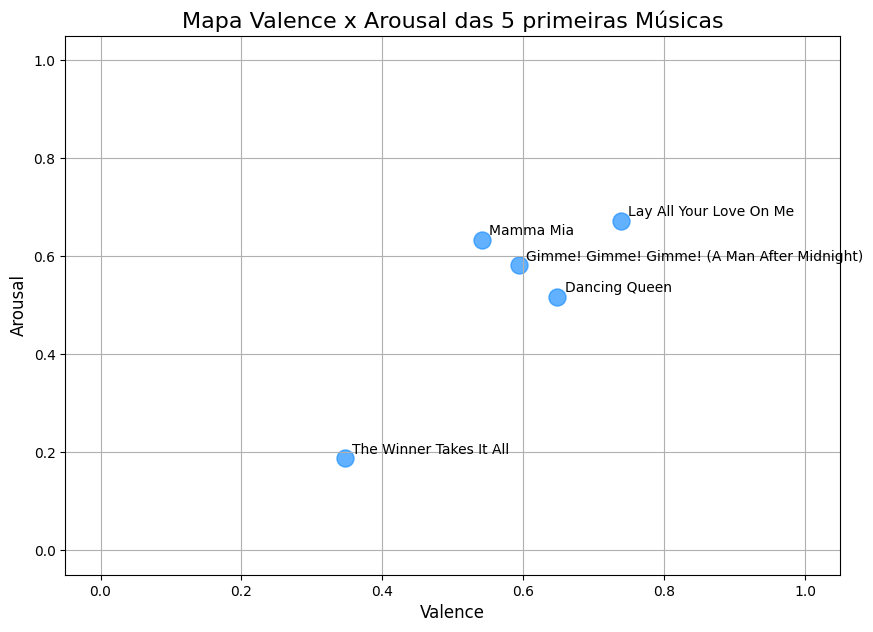

In [ ]:
import matplotlib.pyplot as plt

df_plot = df_inicial.head(5)

musicas = df_plot['M√∫sica']
arousal = df_plot['Arousal']
valence = df_plot['Valence']

plt.figure(figsize=(10,7))
plt.scatter(valence, arousal, color='dodgerblue', s=150, alpha=0.7)

for i, musica in enumerate(musicas):
    plt.text(valence[i]+0.01, arousal[i]+0.01, musica, fontsize=10)

plt.title("Mapa Valence x Arousal das 5 primeiras M√∫sicas", fontsize=16)
plt.xlabel("Valence", fontsize=12)
plt.ylabel("Arousal", fontsize=12)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.show()

---
# 9. Treinando Modelo

Para que o Sinton.IA consiga prever o Arousal e o Valence de novas m√∫sicas, utilizamos um modelo de Random Forest Regressor, um algoritmo de aprendizado de m√°quina usado para previs√£o de valores cont√≠nuos, ou seja, regress√£o. Ele faz parte da fam√≠lia dos m√©todos de ensemble, que combinam v√°rios modelos mais simples para criar uma previs√£o mais robusta e precisa.


### 9.1. Como funciona:

**1. √Årvores de Decis√£o:**

O modelo cria v√°rias √°rvores de decis√£o.

Cada √°rvore aprende a prever a sa√≠da (Arousal e Valence) a partir das features (tempo, energia, brilho e polaridade) usando divis√µes em n√≥s que minimizam o erro.

**2. Randomiza√ß√£o:**

Cada √°rvore √© treinada com um subconjunto aleat√≥rio dos dados e um subconjunto aleat√≥rio das features.

Isso evita que todas as √°rvores sejam iguais e melhora a capacidade de generaliza√ß√£o do modelo.

**3. Combina√ß√£o das √Årvores:**

Para fazer uma previs√£o final, o Random Forest faz a m√©dia das previs√µes de todas as √°rvores (no caso de regress√£o).

Essa m√©dia reduz o risco de erros de uma √∫nica √°rvore e torna a previs√£o mais est√°vel.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selecionar features e labels
features = ['tempo_norm', 'energy_norm', 'spectral_centroid_norm', 'Polaridade_norm']
X = df_inicial[features]

# Labels: Arousal e Valence
y = df_inicial[['Arousal', 'Valence']]

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo de regress√£o
modelo = RandomForestRegressor(n_estimators=200, random_state=42)
modelo.fit(X_train, y_train)

# Avaliar
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Erro quadr√°tico m√©dio: {mse:.4f}")

Erro quadr√°tico m√©dio: 0.0058


In [ ]:
import numpy as np

# Exemplo de humor do usu√°rio
user_arousal = 0.7
user_valence = 0.8

# Calcular dist√¢ncia entre usu√°rio e m√∫sicas
distances = np.sqrt(
    (df_inicial['Arousal'] - user_arousal)**2 +
    (df_inicial['Valence'] - user_valence)**2
)

# Top 5 m√∫sicas mais pr√≥ximas
recommended = df_inicial.iloc[distances.nsmallest(5).index]
print(recommended[['M√∫sica', 'Artista', 'Arousal', 'Valence']])

                          M√∫sica Artista   Arousal   Valence
15                           SOS    ABBA  0.673717  0.775186
3        Lay All Your Love On Me    ABBA  0.672829  0.738863
23  I Do, I Do, I Do, I Do, I Do    ABBA  0.617879  0.796185
42     I've Been Waiting For You    ABBA  0.704530  0.693397
22             Summer Night City    ABBA  0.752033  0.684154


# 10. Fun√ß√£o de Recomenda√ß√£o

Com os valores de Arousal e Valence calculados para cada m√∫sica, podemos agora construir a fun√ß√£o principal do nosso agente. Esta fun√ß√£o ir√° recomendar m√∫sicas com base no humor desejado pelo usu√°rio.

A l√≥gica √© a seguinte:

1. Definir Perfis de Humor: Mapeamos emo√ß√µes comuns (como "Feliz", "Calmo", "Triste", "Energ√©tico") para coordenadas espec√≠ficas no espa√ßo Valence-Arousal. Por exemplo, uma m√∫sica "Feliz" teria alta Valence e alto Arousal.

2. Calcular a Dist√¢ncia: Para cada m√∫sica no nosso DataFrame, calculamos a dist√¢ncia euclidiana entre o seu ponto (Valence, Arousal) e o ponto do humor alvo. A f√≥rmula da dist√¢ncia √©: D=
sqrt(V_alvo ‚àí V_m√∫sica)^2 + (A_alvo ‚àí A_m√∫sica)^2

3. Ordenar e Recomendar: As m√∫sicas com a menor dist√¢ncia s√£o as mais pr√≥ximas do sentimento desejado e, portanto, as mais recomendadas. A fun√ß√£o retornar√° uma lista ordenada com as melhores correspond√™ncias.

In [ ]:
def prever_arousal_valence(df_features):
    # Normalizar usando o scaler j√° treinado
    X_scaled = scaler.transform(df_features[features])

    # Prever Arousal e Valence
    predicoes = modelo.predict(X_scaled)

    # Adicionar as previs√µes ao DataFrame original
    df_features['Arousal'] = predicoes[:, 0]
    df_features['Valence'] = predicoes[:, 1]

    return df_features

In [ ]:
def recomendar_musicas_modelo(df_modelo, humor, top_n, modelo, scaler):
    perfis_de_humor = {
        "feliz":      {"valence": 0.9, "arousal": 0.8},
        "calmo":      {"valence": 0.6, "arousal": 0.2},
        "triste":     {"valence": 0.2, "arousal": 0.3},
        "energetico": {"valence": 0.7, "arousal": 0.9},
        "focado":     {"valence": 0.4, "arousal": 0.3},
        "romantico":  {"valence": 0.9, "arousal": 0.4},
        "euforico":   {"valence": 0.9, "arousal": 0.9}
    }

    humor_selecionado = perfis_de_humor.get(humor.lower())
    if not humor_selecionado:
        print(f"Humor '{humor}' n√£o reconhecido. Tente um dos seguintes: {list(perfis_de_humor.keys())}")
        return pd.DataFrame(), pd.DataFrame()

    target_valence = humor_selecionado["valence"]
    target_arousal = humor_selecionado["arousal"]

    # Features que o modelo espera
    features_modelo = ['tempo_norm', 'energy_norm', 'spectral_centroid_norm', 'Polaridade_norm']

    # Filtrar m√∫sicas com features v√°lidas
    df_filtrado = df_modelo.dropna(subset=features_modelo)
    if df_filtrado.empty:
        print("N√£o h√° m√∫sicas com features suficientes para previs√£o.")
        return pd.DataFrame(), pd.DataFrame()

    # Normalizar e prever Arousal e Valence
    X_scaled = scaler.transform(df_filtrado[features_modelo])
    predicoes = modelo.predict(X_scaled)
    df_filtrado = df_filtrado.copy()
    df_filtrado['Arousal'] = predicoes[:, 0]
    df_filtrado['Valence'] = predicoes[:, 1]

    # Calcular dist√¢ncia ao perfil de humor
    df_filtrado['Distancia'] = np.sqrt(
        (target_valence - df_filtrado['Valence'])**2 +
        (target_arousal - df_filtrado['Arousal'])**2
    )

    df_recomendado = df_filtrado.sort_values(by='Distancia', ascending=True)

    return df_recomendado.head(top_n), df_recomendado.tail(top_n)

# 11. Sinton.IA: Interface do Agente
Agora que todas as fun√ß√µes foram criadas, vamos construir a interface final que interage com o usu√°rio. Este bloco de c√≥digo ir√°:

1. Perguntar as Prefer√™ncias: Solicitar ao usu√°rio um termo de busca (artista, g√™nero ou palavra-chave) e o humor desejado para a playlist.

2. Executar o Pipeline: Chamar em sequ√™ncia todas as fun√ß√µes que desenvolvemos:

- Buscar m√∫sicas na API do Deezer (fetchSongs).

- Extrair features de √°udio (extract_audio_features).

- Analisar o sentimento das letras (fetchLyrics, analisar_sentimento).

- Calcular Arousal e Valence.

3. Gerar a Playlist: Utilizar a fun√ß√£o recomendar_musicas para obter a lista final.

4. Exibir os Resultados: Apresentar a playlist recomendada de forma clara e organizada, permitindo que o usu√°rio ou√ßa uma pr√©via da m√∫sica selecionada.

In [ ]:
from IPython.display import display, Audio
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

def pipeline_completo(modelo, scaler):
    print("ü§ñ Ol√°! Eu sou o Sinton.IA, seu assistente de playlists.")
    termo_busca = input("üéµ Para come√ßar, digite um artista, g√™nero ou tema para a busca: ")
    humor_desejado = input("üòÉ Qual o sentimento que voc√™ busca? (feliz, calmo, triste, energetico, focado, romantico, euforico): ")

    count = 0
    novo_termo = ''
    fim = False  # controla sa√≠da do loop

    # Busca inicial
    print(f"\nBuscando m√∫sicas para '{termo_busca}'...")
    dados_musicas = fetchSongs(termo_busca, limit=30)  # menos m√∫sicas para acelerar
    df_modelo = insertSongsIntoDataFrame(dados_musicas)

    while count < 4:
        if fim:
            break

        if novo_termo != '':
            print('Adicionando novas m√∫sicas...')
            termo_busca = novo_termo
            limit = 15  # menos m√∫sicas em itera√ß√µes posteriores
            dados_musicas = fetchSongs(termo_busca, limit)
            novo_df = insertSongsIntoDataFrame(dados_musicas)
            df_modelo = pd.concat([df_modelo, novo_df], ignore_index=True)

        if df_modelo.empty:
            print("Nenhuma m√∫sica com pr√©via de √°udio foi encontrada. Tente outro termo.")
            return

        print(f"Encontradas {len(df_modelo)} m√∫sicas. Analisando...")
        tempo_list, energy_list, spectral_centroid_list, spectral_bandwidth_list, letras_list = [], [], [], [], []

        # Extra√ß√£o de features e letras
        for idx, row in tqdm(df_modelo.iterrows(), total=len(df_modelo), desc="Extraindo features"):
            save_path = f"preview_{idx}.mp3"
            success = download_preview(row["Pr√©via_URL"], save_path)

            if success:
                features = extract_audio_features(save_path)
                os.remove(save_path)
            else:
                features = None

            if features:
                # Converter arrays para floats
                tempo_list.append(float(features['tempo'][0]) if isinstance(features['tempo'], np.ndarray) else float(features['tempo']))
                energy_list.append(float(features['energy'][0]) if isinstance(features['energy'], np.ndarray) else float(features['energy']))
                spectral_centroid_list.append(float(features['spectral_centroid'][0]) if isinstance(features['spectral_centroid'], np.ndarray) else float(features['spectral_centroid']))
                spectral_bandwidth_list.append(float(features['spectral_bandwidth'][0]) if isinstance(features['spectral_bandwidth'], np.ndarray) else float(features['spectral_bandwidth']))
            else:
                tempo_list.append(None)
                energy_list.append(None)
                spectral_centroid_list.append(None)
                spectral_bandwidth_list.append(None)

            letra = fetchLyrics(row['Artista'], row['M√∫sica'])
            letras_list.append(letra if letra else "")

        df_modelo["tempo"] = tempo_list
        df_modelo["energy"] = energy_list
        df_modelo["spectral_centroid"] = spectral_centroid_list
        df_modelo["spectral_bandwidth"] = spectral_bandwidth_list
        df_modelo['Letra'] = letras_list

        # An√°lise de sentimentos
        sentimentos = df_modelo['Letra'].apply(analisar_sentimento)
        df_modelo[['Polaridade', 'Subjetividade']] = pd.DataFrame(sentimentos.tolist(), index=df_modelo.index)

        df_modelo.dropna(subset=['tempo', 'energy', 'spectral_centroid'], inplace=True)
        if df_modelo.empty:
            print("N√£o foi poss√≠vel extrair features suficientes.")
            return

        # Normaliza√ß√£o das features para o modelo
        df_modelo['tempo_norm'] = (df_modelo['tempo'] - df_modelo['tempo'].mean()) / df_modelo['tempo'].std()
        df_modelo['energy_norm'] = (df_modelo['energy'] - df_modelo['energy'].mean()) / df_modelo['energy'].std()
        df_modelo['spectral_centroid_norm'] = (df_modelo['spectral_centroid'] - df_modelo['spectral_centroid'].mean()) / df_modelo['spectral_centroid'].std()
        df_modelo['Polaridade_norm'] = (df_modelo['Polaridade'] - df_modelo['Polaridade'].mean()) / df_modelo['Polaridade'].std()

        # Previs√£o de Arousal e Valence
        X_modelo = df_modelo[['tempo_norm', 'energy_norm', 'spectral_centroid_norm', 'Polaridade_norm']]
        predicoes = modelo.predict(X_modelo)
        df_modelo[['Arousal', 'Valence']] = predicoes

        top_n = 15
        print("\n‚úÖ An√°lise conclu√≠da! Gerando playlist...")

        # Recomenda m√∫sicas usando o modelo
        playlist, playlist_negative = recomendar_musicas_modelo(df_modelo, humor_desejado, top_n, modelo, scaler)

        if playlist.empty:
            print("N√£o consegui gerar uma playlist com os crit√©rios informados.")
            return

        print(f"\n--- SUA PLAYLIST '{humor_desejado.upper()}' ---")
        display(playlist[['Artista', 'M√∫sica', 'Arousal', 'Valence', 'Distancia']])

        print("\nüéß Playlist criada com sucesso! Encerrando execu√ß√£o. üëã")
        break

        # Tocar pr√©via
        try:
            escolha = input("\nüéß Digite o √≠ndice da m√∫sica para ouvir a pr√©via ou 'sair' para finalizar: ")
            if escolha.lower() == 'sair':
                print("At√© a pr√≥xima! üëã")
                fim = True
                continue

            indice_musica = int(escolha)
            if indice_musica in playlist.index:
                musica_selecionada = playlist.loc[indice_musica]
                novo_termo = musica_selecionada['Artista']
                print(f"Tocando: {musica_selecionada['M√∫sica']} - {musica_selecionada['Artista']}")
                display(Audio(url=musica_selecionada['Pr√©via_URL'], autoplay=True))
            else:
                print("√çndice inv√°lido.")
        except (ValueError, KeyError):
            print("Entrada inv√°lida.")

        # Remover m√∫sicas j√° reproduzidas ou negativas
        df_modelo = df_modelo.drop(playlist.tail(2).index)
        df_modelo = df_modelo.drop(playlist_negative.head(7).index)

        count += 1

In [ ]:
pipeline_completo(modelo, scaler)

ü§ñ Ol√°! Eu sou o Sinton.IA, seu assistente de playlists.
üéµ Para come√ßar, digite um artista, g√™nero ou tema para a busca: abba
üòÉ Qual o sentimento que voc√™ busca? (feliz, calmo, triste, energetico, focado, romantico, euforico): triste

Buscando m√∫sicas para 'abba'...
Encontradas 30 m√∫sicas. Analisando...


Extraindo features: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [01:07<00:00,  2.26s/it]


‚úÖ An√°lise conclu√≠da! Gerando playlist...

--- SUA PLAYLIST 'TRISTE' ---



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Artista                       M√∫sica   Arousal   Valence  Distancia
1     ABBA      The Winner Takes It All  0.312991  0.310624   0.111384
5     ABBA                   Chiquitita  0.312991  0.310624   0.111384
14    ABBA      The Day Before You Came  0.312991  0.310624   0.111384
10    ABBA                Super Trouper  0.312991  0.310624   0.111384
25    ABBA              Our Last Summer  0.312991  0.310624   0.111384
19    ABBA               I Have A Dream  0.312991  0.310624   0.111384
9     ABBA                     Fernando  0.325002  0.312531   0.115275
8     ABBA          Money, Money, Money  0.366027  0.312147   0.130140
29    ABBA             Andante, Andante  0.345158  0.333488   0.140919
4     ABBA                    Mamma Mia  0.464731  0.289740   0.187589
28    ABBA              Head Over Heels  0.337909  0.384092   0.187955
26    ABBA               Happy New Year  0.352886  0.409782   0.216346
12    ABBA  Slipping Through My Fingers  0.511303  0.259419   0.219498
18    ABBA                    One Of Us  0.512617  0.261995   0.221471
16    ABBA                    Angeleyes  0.470869  0.342023   0.222187


üéß Playlist criada com sucesso! Encerrando execu√ß√£o. üëã


---
# 12. Conclus√£o

Este projeto demonstrou o desenvolvimento do Sinton.IA, um agente inteligente capaz de criar playlists personalizadas com base no estado emocional e nas prefer√™ncias musicais do usu√°rio. Partindo de um simples termo de busca, o agente foi capaz de coletar, processar e analisar dados de m√∫ltiplas fontes para gerar recomenda√ß√µes musicais relevantes e contextuais.

Sinton.IA foi fundamentado na integra√ß√£o de diversas t√©cnicas de Intelig√™ncia Artificial, que foram cruciais em cada etapa do processo:

* Processamento de Linguagem Natural (PLN) para An√°lise de Sentimentos: Utilizamos a biblioteca TextBlob para analisar as letras das m√∫sicas. Esta t√©cnica de PLN permitiu quantificar o sentimento expresso no texto (positivo, negativo ou neutro) atrav√©s da m√©trica de Polaridade, que se tornou um pilar fundamental para a constru√ß√£o da dimens√£o emocional Valence.

* Extra√ß√£o de Caracter√≠sticas de √Åudio (Audio Feature Extraction): Com o aux√≠lio da biblioteca librosa, extra√≠mos caracter√≠sticas ac√∫sticas das pr√©vias de √°udio, como tempo, energy (energia) e spectral_centroid (brilho sonoro). Essas features transformaram o √°udio em dados num√©ricos que representam a intensidade e o tom da m√∫sica, servindo de base para a dimens√£o Arousal.

* Aprendizado de M√°quina Supervisionado (Regress√£o): O n√∫cleo do nosso agente √© um modelo de Random Forest Regressor, treinado com as caracter√≠sticas de √°udio e texto. Esta t√©cnica de aprendizado supervisionado permitiu que o sistema aprendesse a prever os valores de Arousal (excita√ß√£o) e Valence (val√™ncia emocional) para qualquer m√∫sica, generalizando o conhecimento adquirido para al√©m dos dados de treinamento.

* Sistema de Recomenda√ß√£o Baseado em Conte√∫do (Content-Based Filtering): A recomenda√ß√£o final √© realizada por um sistema que calcula a dist√¢ncia Euclidiana entre o perfil emocional desejado pelo usu√°rio (ex: "feliz") e as coordenadas (Arousal, Valence) de cada m√∫sica. As m√∫sicas com a menor dist√¢ncia s√£o as mais compat√≠veis, caracterizando uma abordagem de recomenda√ß√£o baseada no conte√∫do intr√≠nseco de cada faixa.

Em suma, o Sinton.IA foi desenvolvido como a combina√ß√£o de an√°lise de √°udio, processamento de texto e modelos de Machine Learning pode resolver o desafio complexo de recomenda√ß√£o musical. O projeto n√£o apenas atingiu seu objetivo principal de gerar playlists personalizadas, mas tamb√©m serviu como uma aplica√ß√£o pr√°tica e robusta dos conceitos fundamentais de Intelig√™ncia Artificial.